<a href="https://colab.research.google.com/github/Nabizeus/textsemantix/blob/main/Multiclass_Reuters_Newswire_DeepLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [10]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [17]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

#Note that the indices are offset by 3 because 0, 1, and 2 are reserved
#indices for “padding,” “start of sequence,” and “unknown.”

In [18]:
decoded_newswire[:]

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [19]:
train_labels[10]

3

**3.14 Encoding the data**

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data

In [23]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you’ve already seen in action
in the MNIST example:



In [24]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Building your network**

In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


There are two other things you should note about this architecture:


*   You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class. 
*    The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.




 
 *The best loss function to use in this case is **categorical_crossentropy**. It measures
the distance between two probability distributions: here, between the probability distribution
output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output something
as close a  possible to the true labels.*

In [26]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

**Validation**

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.5600 - accuracy: 0.5427 - val_loss: 1.6944 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4022 - accuracy: 0.7130 - val_loss: 1.2836 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0571 - accuracy: 0.7739 - val_loss: 1.1146 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8497 - accuracy: 0.8170 - val_loss: 1.0169 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6915 - accuracy: 0.8514 - val_loss: 0.9734 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5655 - accuracy: 0.8773 - val_loss: 0.9102 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4628 - accuracy: 0.9005 - val_loss: 0.9008 - val_accuracy: 0.8060
Epoch 8/20
16

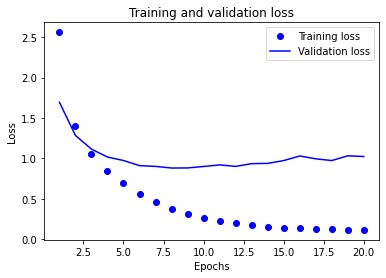

In [29]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

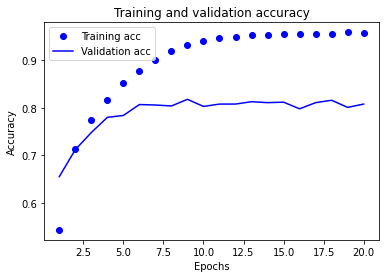

In [32]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 2s 63ms/step - loss: 2.7474 - accuracy: 0.5182 - val_loss: 1.7839 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4192 - accuracy: 0.7126 - val_loss: 1.2961 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0274 - accuracy: 0.7835 - val_loss: 1.1274 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8084 - accuracy: 0.8272 - val_loss: 1.0508 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6522 - accuracy: 0.8609 - val_loss: 1.0007 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5252 - accuracy: 0.8896 - val_loss: 0.9504 - val_accuracy: 0.7920
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4245 - accuracy: 0.9114 - val_loss: 0.9232 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [34]:
results

[1.0120307207107544, 0.7827248573303223]

**Random Baseline test**

In [35]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1705253784505788

In [36]:
predictions = model.predict(x_test)

In [45]:
predictions.shape
# 2246 samples and 46 dimensions (newsgropus/classes)

(2246, 46)

In [39]:
np.sum(predictions[0])

1.0000001

In [52]:
np.argmax(predictions[100])


41

**Listing 3.23 A model with an information bottleneck**

In [67]:
results_loss=[]
results_acc=[]
for nodes in range(4,256,5):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(nodes, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))
  model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
  model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=128,
  validation_data=(x_val, y_val),verbose=0)
  results = model.evaluate(x_test, one_hot_test_labels)
  results_loss.append(results[0])
  results_acc.append(results[1])
  print('Nodes:', nodes)
  print('Results:', results)
  print('=====================================')


71/71 [==============================] - 0s 3ms/step - loss: 2.3446 - accuracy: 0.6496
Nodes: 4
Results: [2.3445634841918945, 0.6495993137359619]
71/71 [==============================] - 0s 3ms/step - loss: 1.7836 - accuracy: 0.7524
Nodes: 9
Results: [1.783590316772461, 0.7524487972259521]
71/71 [==============================] - 0s 3ms/step - loss: 1.6173 - accuracy: 0.7694
Nodes: 14
Results: [1.6173458099365234, 0.7693677544593811]
71/71 [==============================] - 0s 4ms/step - loss: 1.5626 - accuracy: 0.7663
Nodes: 19
Results: [1.562624454498291, 0.7662510871887207]
71/71 [==============================] - 0s 3ms/step - loss: 1.6428 - accuracy: 0.7614
Nodes: 24
Results: [1.6428074836730957, 0.7613534927368164]
71/71 [==============================] - 0s 4ms/step - loss: 1.6200 - accuracy: 0.7711
Nodes: 29
Results: [1.6199517250061035, 0.771148681640625]
71/71 [==============================] - 0s 3ms/step - loss: 1.4824 - accuracy: 0.7801
Nodes: 34
Results: [1.48244285583496

In [60]:
results[0]

1.590584635734558

In [72]:
xnode =np.arange(4,256,5)
xnode

array([  4,   9,  14,  19,  24,  29,  34,  39,  44,  49,  54,  59,  64,
        69,  74,  79,  84,  89,  94,  99, 104, 109, 114, 119, 124, 129,
       134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194,
       199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254])

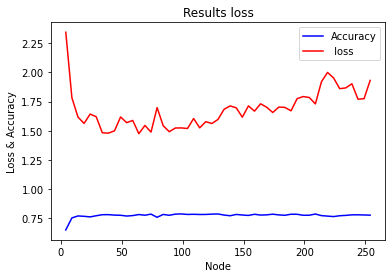

In [77]:
import matplotlib.pyplot as plt


plt.plot(xnode, results_acc, 'b', label='Accuracy')
plt.plot(xnode, results_loss, 'r', label=' loss')
plt.title('Results loss')
plt.xlabel('Node')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()